<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Week-7-pandas-sql-plot/Pandas_Numpy_Linear_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather['DAY_OF_YEAR'] = df_weather.index+1

# Correlation Matrix
Find the most correlated column with MAX Temperature

In [ ]:
# Now, find the most correlated column with MAX Temperature
print('HIGHEST CORRELATION:', df_weather.corr()['MAX_TEMPERATURE_C'].nlargest(2))

# Did you know that you can have a correlation heatmap with a simple line ?
df_weather.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

HIGHEST CORRELATION: MAX_TEMPERATURE_C    1.000000
HEATINDEX_MAX_C      0.993324
Name: MAX_TEMPERATURE_C, dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY,DAY_OF_YEAR
MAX_TEMPERATURE_C,1.00,0.88,-0.11,0.83,0.98,0.98,-0.21,-0.70,0.10,-0.00,-0.46,0.99,0.83,0.94,-0.19,-0.19,-0.30,nan,0.40,0.69,0.20,0.12,0.20
MIN_TEMPERATURE_C,0.88,1.00,0.12,0.95,0.89,0.85,-0.02,-0.53,-0.01,-0.19,-0.13,0.88,0.88,0.95,0.01,0.06,-0.14,nan,0.38,0.47,0.28,0.12,0.29
WINDSPEED_MAX_KMH,-0.11,0.12,1.00,0.19,-0.05,-0.12,0.39,0.01,-0.04,-0.38,0.39,-0.11,0.06,-0.00,0.33,0.42,0.28,nan,-0.04,-0.23,0.17,-0.08,0.16
TEMPERATURE_MORNING_C,0.83,0.95,0.19,1.00,0.87,0.81,0.05,-0.46,-0.02,-0.25,-0.04,0.82,0.88,0.92,0.10,0.13,-0.10,nan,0.34,0.41,0.34,0.12,0.35
TEMPERATURE_NOON_C,0.98,0.89,-0.05,0.87,1.00,0.97,-0.18,-0.67,0.08,-0.06,-0.38,0.96,0.84,0.95,-0.15,-0.14,-0.24,nan,0.41,0.66,0.21,0.11,0.22
TEMPERATURE_EVENING_C,0.98,0.85,-0.12,0.81,0.97,1.00,-0.21,-0.68,0.10,0.00,-0.43,0.96,0.81,0.91,-0.20,-0.19,-0.29,nan,0.40,0.68,0.17,0.12,0.18
PRECIP_TOTAL_DAY_MM,-0.21,-0.02,0.39,0.05,-0.18,-0.21,1.00,0.27,-0.17,-0.47,0.46,-0.21,-0.00,-0.11,0.41,0.51,0.37,nan,-0.11,-0.35,0.13,-0.04,0.13
HUMIDITY_MAX_PERCENT,-0.70,-0.53,0.01,-0.46,-0.67,-0.68,0.27,1.00,-0.21,-0.01,0.54,-0.69,-0.34,-0.61,0.21,0.28,0.29,nan,-0.38,-0.63,-0.15,-0.02,-0.15
VISIBILITY_AVG_KM,0.10,-0.01,-0.04,-0.02,0.08,0.10,-0.17,-0.21,1.00,0.14,-0.33,0.10,-0.02,0.03,-0.16,-0.18,-0.14,nan,-0.04,0.30,-0.12,0.05,-0.12
PRESSURE_MAX_MB,-0.00,-0.19,-0.38,-0.25,-0.06,0.00,-0.47,-0.01,0.14,1.00,-0.44,-0.00,-0.14,-0.13,-0.41,-0.44,-0.39,nan,-0.02,0.22,-0.35,0.01,-0.34


# ScatterPlot
Draw a scatterplot with MAX Temperature on Y-axis, and the most correlated column on X-axis

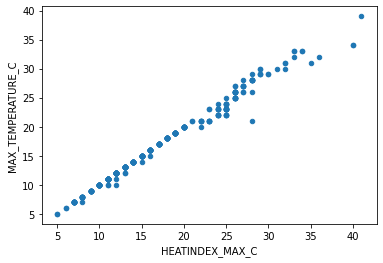

In [ ]:
df_weather.plot.scatter('HEATINDEX_MAX_C', 'MAX_TEMPERATURE_C')
plt.show()

# Univariate linear regression with NumPy

## Find the equation

In [ ]:
# NumPy can find the coefficients of the linear regression

# First of all, you have to define 2 series :
# X-axis : the most correlated column, that you found above
Xaxis = df_weather['HEATINDEX_MAX_C'] # Complete with your column

# Y-axis : the column to predict, so Max Temperature here
Yaxis = df_weather['MAX_TEMPERATURE_C']

In [ ]:
# Then, NumPy calculate automatically coefficient. You just have to execute this code.

model = np.polyfit(x = Xaxis, y = Yaxis, deg = 1)


print("What's the type of this model ?, ", type(model))
print("What's inside ?, ", model)
print("\nHow can I read it ? \nDo you know linear function equation : f(x) = ax + b ? That's it !")
print(round(model[0], 3) ," * x  +  ", round(model[1], 3) )

What's the type of this model ?,  <class 'numpy.ndarray'>
What's inside ?,  [0.93721643 0.74475835]

How can I read it ? 
Do you know linear function equation : f(x) = ax + b ? That's it !
0.937  * x  +   0.745


## Prediction

In [ ]:
# You can "predict" the Max Temperature from your column and the equation
# For example, let's try if your column value is 21.

# Hand calculation :
print("By hand :", model[0] * 21 + model[1] )

# With a NumPy function :
print("NumPy :  ", np.poly1d(model)(21)   )

# And NumPy can calculate the prediction on multiple values, let's try with a list of values :
listtest = [12, 21, 30]
print("NumPy list of values :  ", np.poly1d(model)(listtest)   )

By hand : 20.426303380116146
NumPy :   20.426303380116146
NumPy list of values :   [11.99135551 20.42630338 28.86125125]


## Scatterplot and linear regression on the same chart

In [ ]:
# You have to define your Min and Max value for the X-axis
Xmin = Xaxis.min()
Xmax = Xaxis.max()            # Complete this code

# We generate an array with a range of values between your min and max values
array = np.arange(Xmin, Xmax)
Xmin, Xmax

(5, 41)

In [ ]:
# Please display your array. Just execute the code below:
array

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40])

In [ ]:
# Please display prediction based on the array-values. Just execute the code below:
np.poly1d(model)(array)
poly_vals = np.poly1d(model)(array)

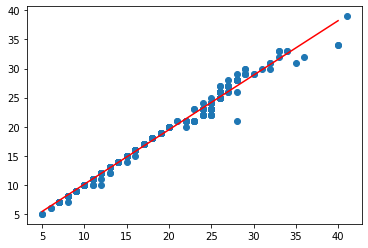

In [ ]:
# On the same chart, draw : 
#         the same scatterplot than above, in blue
#         a red line plot with the array on X-axis and prediction based on the array-values on Y-axis (use np.poly1d function, as previously)
# It's your turn now :

#plt.scatter(df_weather['HEATINDEX_MAX_C'], df_weather['MAX_TEMPERATURE_C'])
plt.scatter(Xaxis, Yaxis)
plt.plot(array, poly_vals, c='r'  )
plt.show()

## Compare it with Seaborn
Draw a [regplot with Seaborn](https://seaborn.pydata.org/generated/seaborn.regplot.html), and compare your charts. It's simpler with Seaborn, but you can't access to the coeffeicient...

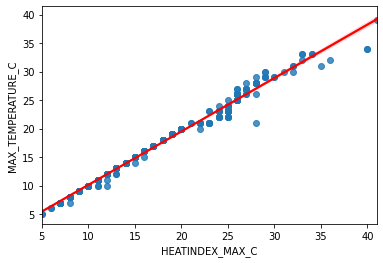

In [ ]:
# Your code for the regplot with seaborn here :
import seaborn as sns

sns.regplot(x='HEATINDEX_MAX_C', y='MAX_TEMPERATURE_C', data=df_weather, line_kws={"color": "red"})

# Polynomial regression

## Create a new model, similar to the previous model, but the X-axis has to be 'Day of the year' column. Y-axis is unchanged (Max Temperature).

Here is an example of expected chart :

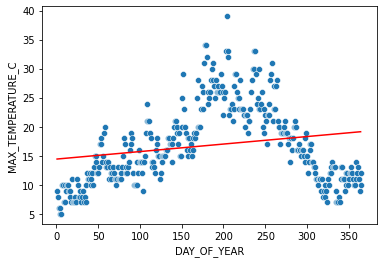


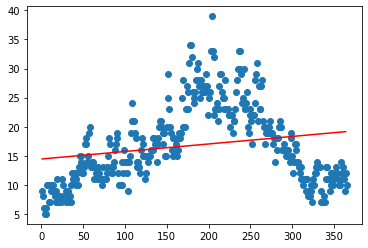

In [ ]:
# Follow the same step as previously, to obtain a chart with :
#       blue scatterplot with real values
#       red lineplot with predicted values (linear regression)
#       'Day of the year' on X-axis
#       Max temperature on Y-axis
# Be carefull : we change the X-axis, so you have to define one more time variables Xaxis, Xmin, Xmax and array before create your "polymodel" with "polyfit"
X_axis = df_weather['DAY_OF_YEAR']
Y_axis = df_weather['MAX_TEMPERATURE_C']

polymodel = np.polyfit(x = X_axis, y = Y_axis, deg = 1) 

X_min = X_axis.min()
X_max = X_axis.max()

array_ = np.arange(X_min, X_max)

np.poly1d(polymodel)(array_)
poly_vals = np.poly1d(polymodel)(array_)

plt.scatter(df_weather['DAY_OF_YEAR'], df_weather['MAX_TEMPERATURE_C'])
plt.plot(array_, poly_vals, c='r'  )
plt.show()

## It doesn't seem a good prediction ? Let's try to change the degree (deg argument of the polyfit function)
[More information here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)

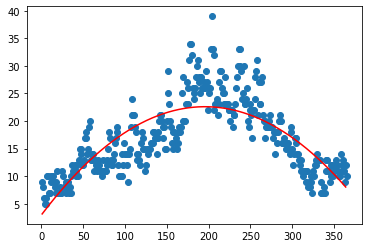

In [ ]:
# Copy-paste your code, and just change the "deg" argument to find a better value
X_axis = df_weather['DAY_OF_YEAR']
Y_axis = df_weather['MAX_TEMPERATURE_C']

polymodel = np.polyfit(x = X_axis, y = Y_axis, deg = 2) 

X_min = X_axis.min()
X_max = X_axis.max()
array_ = np.arange(X_min, X_max)
np.poly1d(polymodel)(array_)
poly_vals = np.poly1d(polymodel)(array_)

plt.scatter(df_weather['DAY_OF_YEAR'], df_weather['MAX_TEMPERATURE_C'])
plt.plot(array_, poly_vals, c='r'  )
plt.show()



## Calculate the predicted Max temperature for the day 171
You have to calculate twice :
- by hand
- with numpy function

In [ ]:
# Hand calculation :
print("By hand :", (polymodel[0] * 171**2) + (polymodel[1] * 171) + polymodel[2] )

# With a NumPy function :
print("NumPy :  ", np.poly1d(polymodel)(171))

By hand : 22.28281939187965
NumPy :   22.282819391879652


# Yes, you did it ! Now, let's save our work in the DataFrame

## Create a new column in the DataFrame, and find a way to write in this column the predicted values corresponding to the Day of the year column. This method could be usefull to fill missing values or outliers for example.


In [ ]:
df_weather['poly'] = df_weather['DAY_OF_YEAR'].apply(lambda x: np.poly1d(polymodel)(x))
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,DAY_OF_YEAR,poly
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1,1,3.147615
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2,2,3.346960
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3,3,3.545277
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4,4,3.742567
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5,5,3.938830
